## Data Visualization

In [2]:
#import required libary
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
from plotly.offline import init_notebook_mode, iplot 
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)
import folium 
from folium import plugins

# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 

# Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8, 5

In [3]:
#read the latest dataset regarding coronavirus
data = pd.read_csv('KaggleVirus.csv')

In [4]:
def random_colours(number_of_colors):
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

### Here in the given dataset we are provided with various columns like "Confirmed", "Suspected", "Recovered", "Deaths", "Demised":

1. But here we are having most of the columns other than Confirmed all are having maximum Zero so it doesn't make any sense by keep them so I dropped all these columns with null.



In [5]:
data.head()

,Sno,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,1/22/2020 12:00,1.0,0.0,0.0
1,2,Beijing,China,1/22/2020 12:00,14.0,0.0,0.0
2,3,Chongqing,China,1/22/2020 12:00,6.0,0.0,0.0
3,4,Fujian,China,1/22/2020 12:00,1.0,0.0,0.0
4,5,Gansu,China,1/22/2020 12:00,0.0,0.0,0.0


In [6]:
data['Last Update'] = data['Last Update'].apply(pd.to_datetime)
data.drop(['Sno'],axis=1,inplace=True)
data.head()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


In [7]:
data['Day'] = data['Last Update'].apply(lambda x:x.day)
data['Hour'] = data['Last Update'].apply(lambda x:x.hour)

In [8]:
data[data['Day'] == 30]

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Day,Hour
375,Hubei,Mainland China,2020-01-30 21:30:00,5806.0,204.0,116.0,30,21
376,Zhejiang,Mainland China,2020-01-30 21:30:00,537.0,0.0,9.0,30,21
377,Guangdong,Mainland China,2020-01-30 21:30:00,393.0,0.0,11.0,30,21
378,Henan,Mainland China,2020-01-30 21:30:00,352.0,2.0,3.0,30,21
379,Hunan,Mainland China,2020-01-30 21:30:00,332.0,0.0,2.0,30,21
380,Jiangxi,Mainland China,2020-01-30 21:30:00,240.0,0.0,7.0,30,21
381,Anhui,Mainland China,2020-01-30 21:30:00,237.0,0.0,3.0,30,21
382,Chongqing,Mainland China,2020-01-30 21:30:00,206.0,0.0,1.0,30,21
383,Shandong,Mainland China,2020-01-30 21:30:00,178.0,0.0,2.0,30,21
384,Sichuan,Mainland China,2020-01-30 21:30:00,177.0,1.0,1.0,30,21


In [9]:
data[data['Day'] == 30].sum()

Confirmed    9776.0
Deaths        213.0
Recovered     187.0
Day          1770.0
Hour         1239.0
dtype: float64

In [10]:
latest_data = data[data['Day'] == 30]

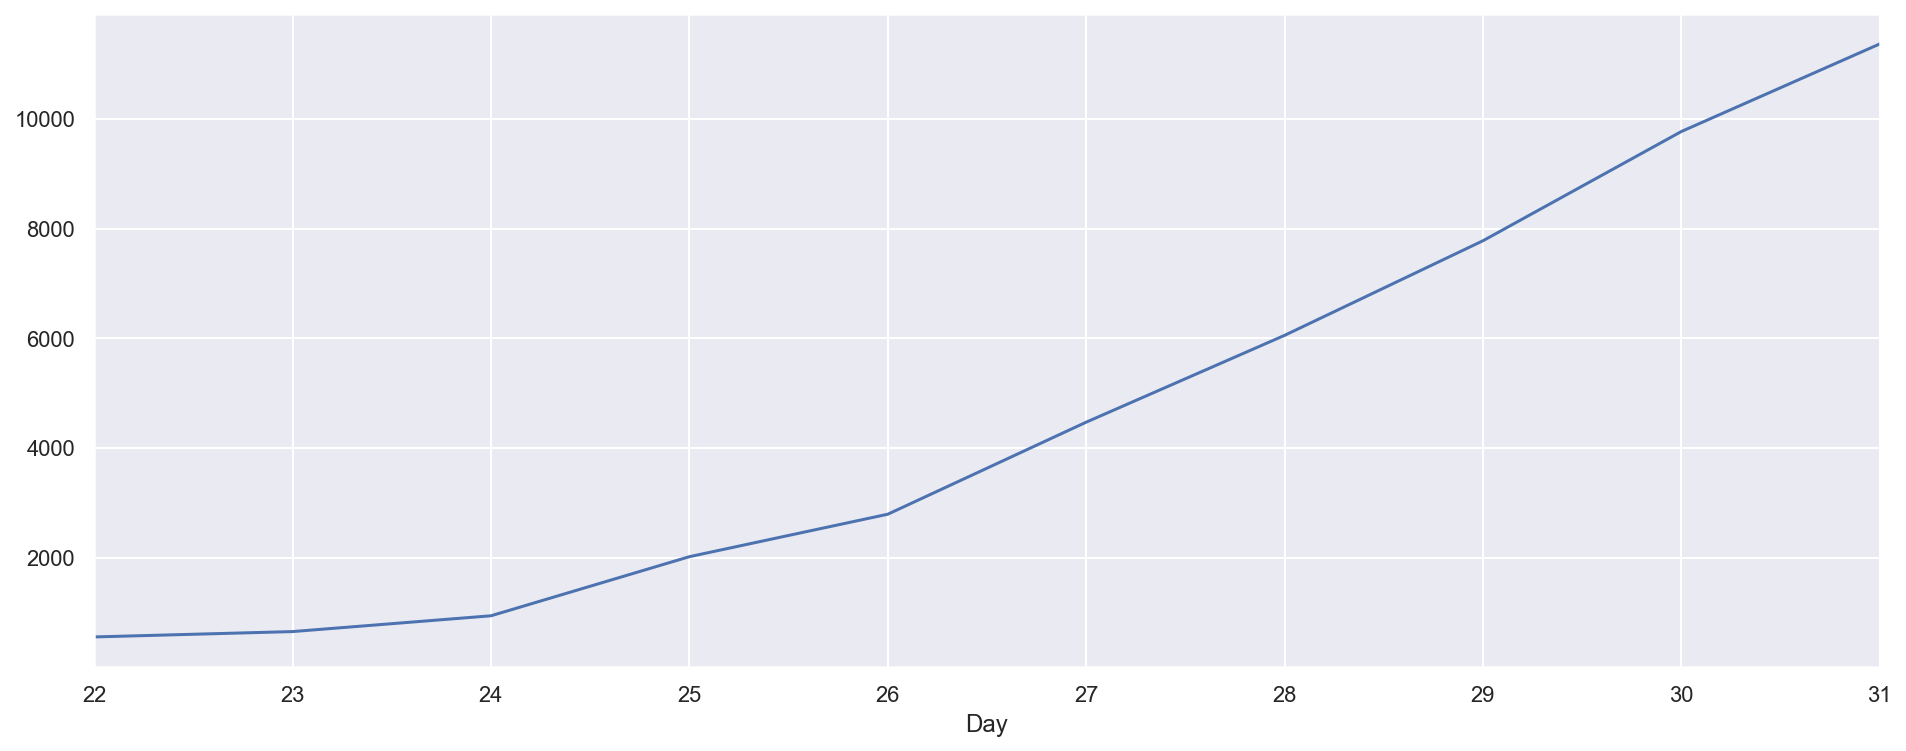

In [11]:
plt.figure(figsize=(16,6))
data.groupby('Day').sum()['Confirmed'].plot()

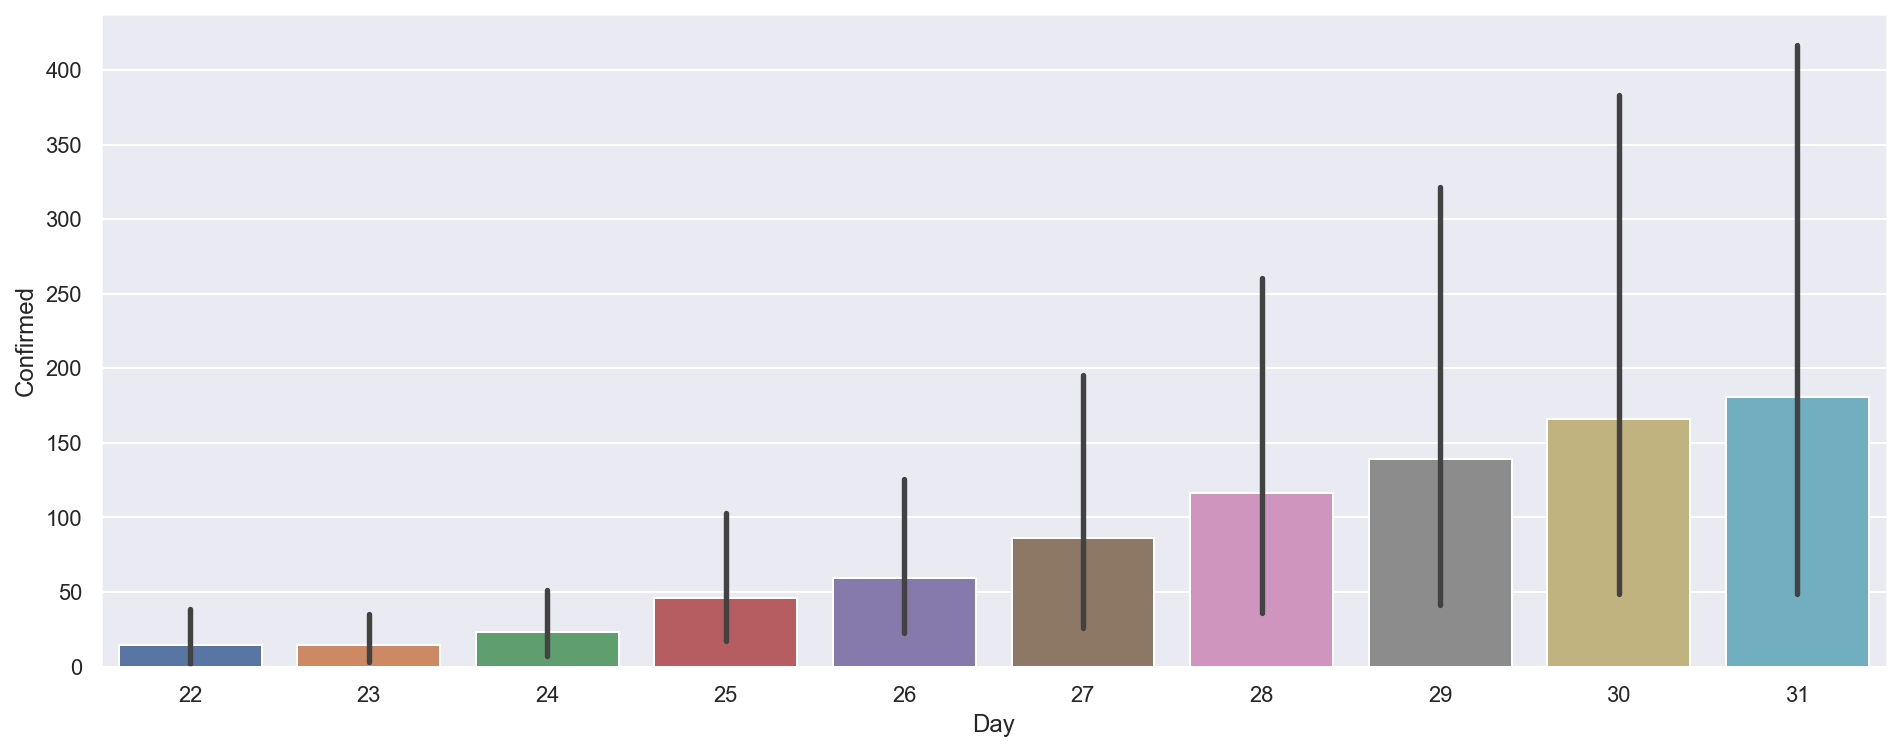

In [12]:
plt.figure(figsize=(16,6))
sns.barplot(x='Day',y='Confirmed',data=data)

## Going deep into  Insight

In [13]:
latest_data.groupby('Country').sum()

,Confirmed,Deaths,Recovered,Day,Hour
Country,,,,,
Australia,9.0,0.0,2.0,90,63
Cambodia,1.0,0.0,0.0,30,21
Canada,3.0,0.0,0.0,60,42
Finland,1.0,0.0,0.0,30,21
France,5.0,0.0,0.0,30,21
Germany,4.0,0.0,0.0,30,21
Hong Kong,12.0,0.0,0.0,30,21
India,1.0,0.0,0.0,30,21
Italy,2.0,0.0,0.0,30,21


Mainland China Has Non-Zero values for Recovery and Deaths that can be explored Later By Creating a Separate DataFrame

In [14]:
data[data['Confirmed']==0]

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Day,Hour
4,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0,22,12
10,Heilongjiang,China,2020-01-22 12:00:00,0.0,0.0,0.0,22,12
12,Hong Kong,China,2020-01-22 12:00:00,0.0,0.0,0.0,22,12
15,Inner Mongolia,China,2020-01-22 12:00:00,0.0,0.0,0.0,22,12
18,Jilin,China,2020-01-22 12:00:00,0.0,0.0,0.0,22,12
22,Qinghai,China,2020-01-22 12:00:00,0.0,0.0,0.0,22,12
23,Shaanxi,China,2020-01-22 12:00:00,0.0,0.0,0.0,22,12
30,Tibet,China,2020-01-22 12:00:00,0.0,0.0,0.0,22,12
32,Xinjiang,China,2020-01-22 12:00:00,0.0,0.0,0.0,22,12
53,Inner Mongolia,Mainland China,2020-01-23 12:00:00,0.0,0.0,0.0,23,12


1. It is Interesting to See that there are parts of Mainland China which have Not been affected by the Virus yet
2. There are some countries with zero confirmed reports and we will drop those

In [15]:
data = data[data['Confirmed'] != 0]

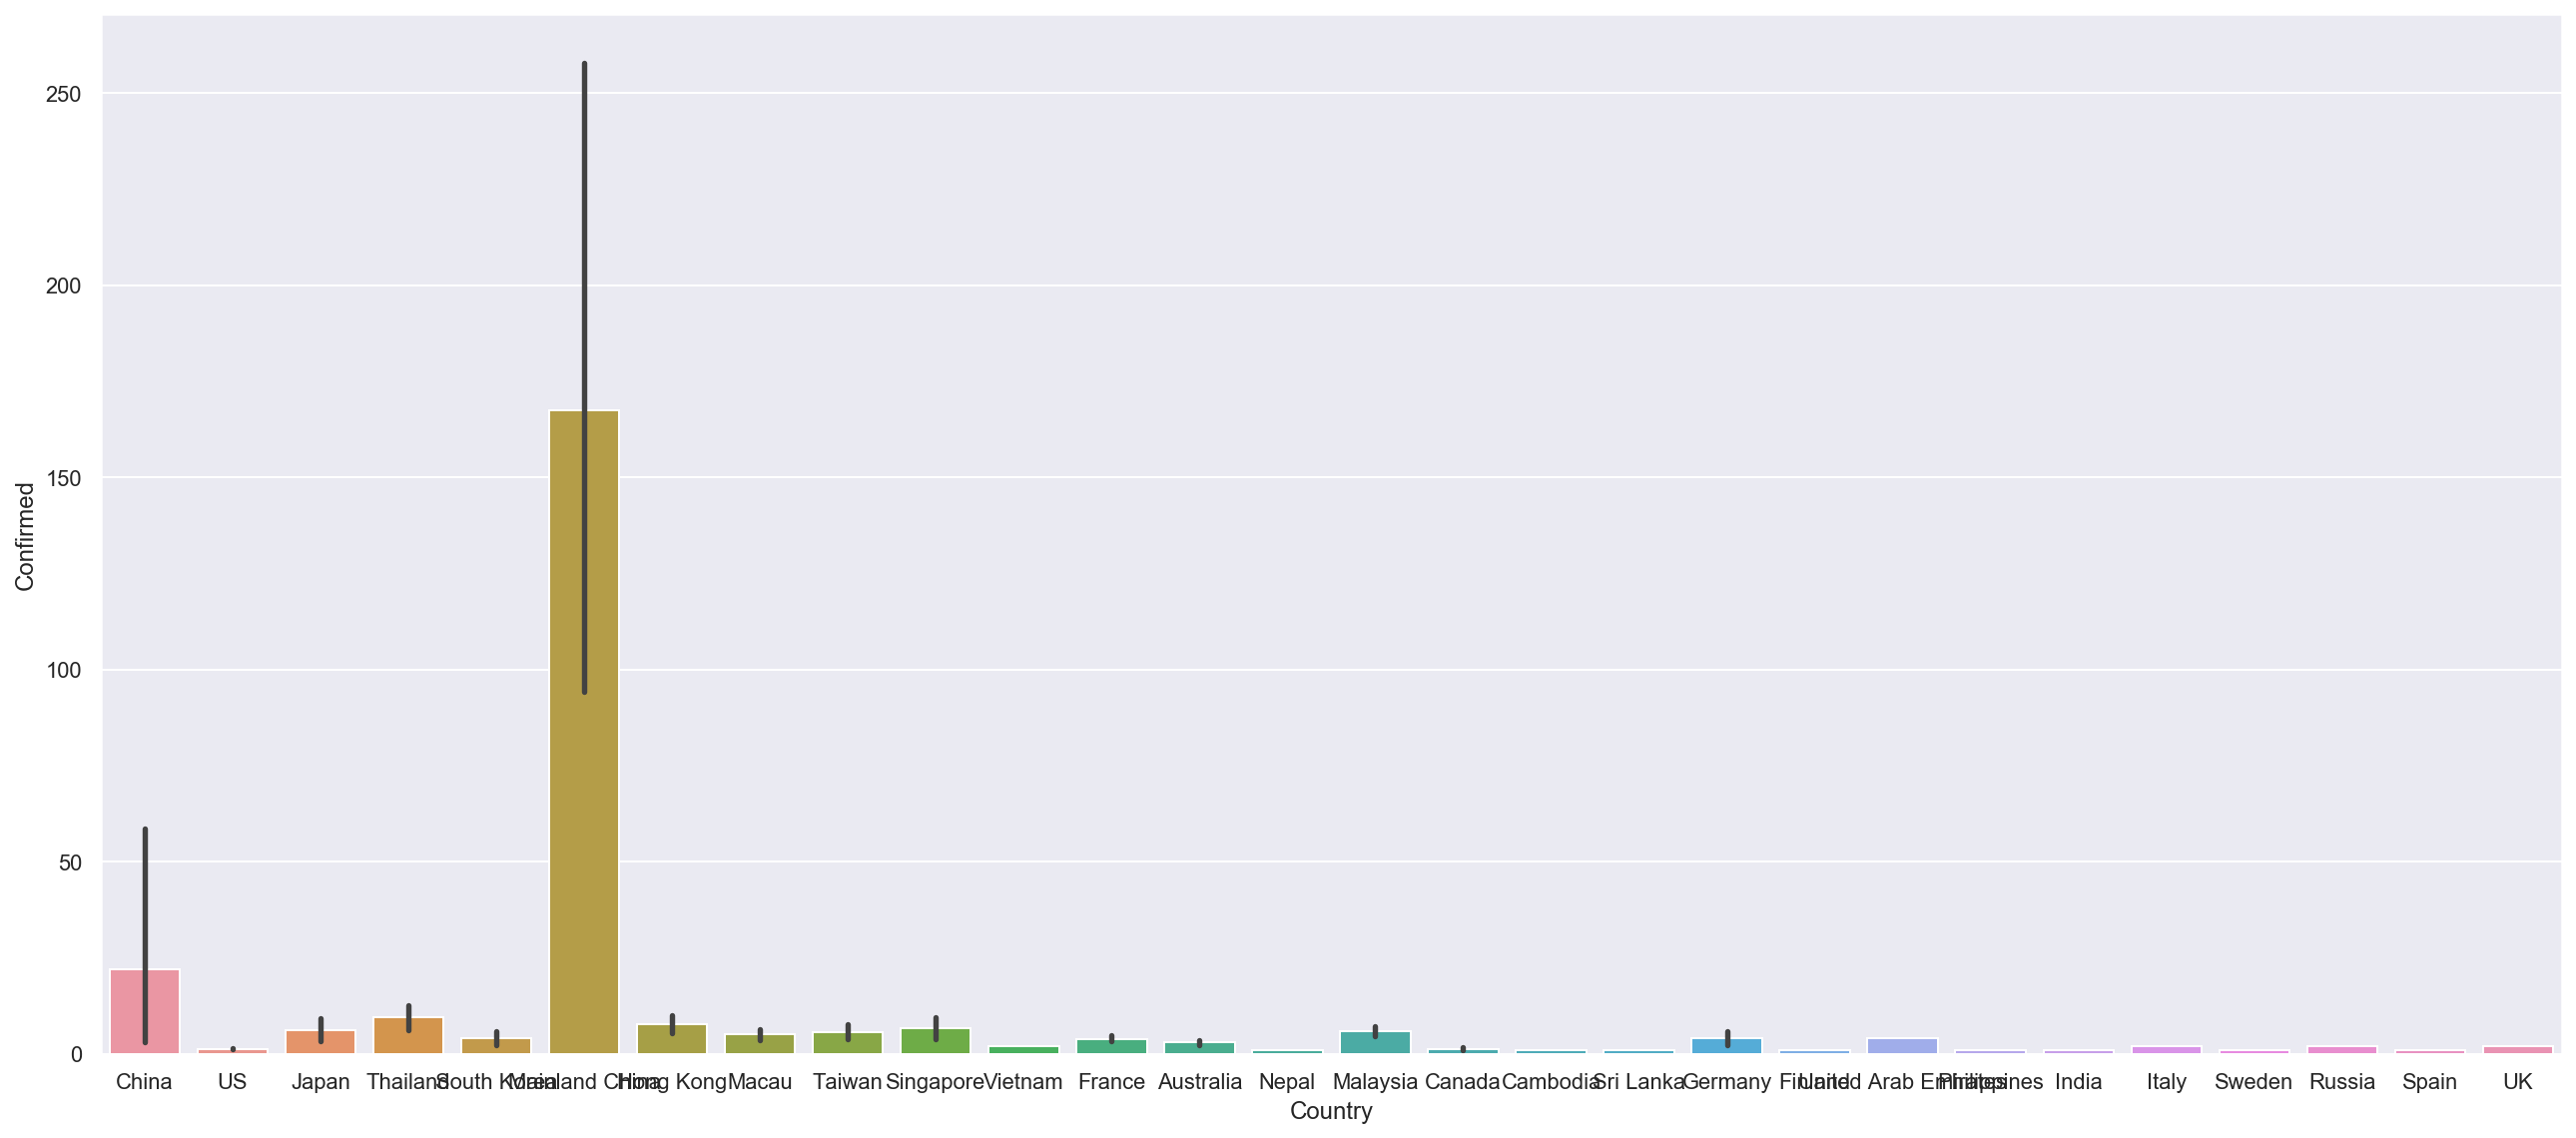

In [16]:
plt.figure(figsize=(18,8))
sns.barplot(x='Country',y='Confirmed',data=data)
plt.tight_layout()

### Having a Look at the growth of corona virus in each Country individually

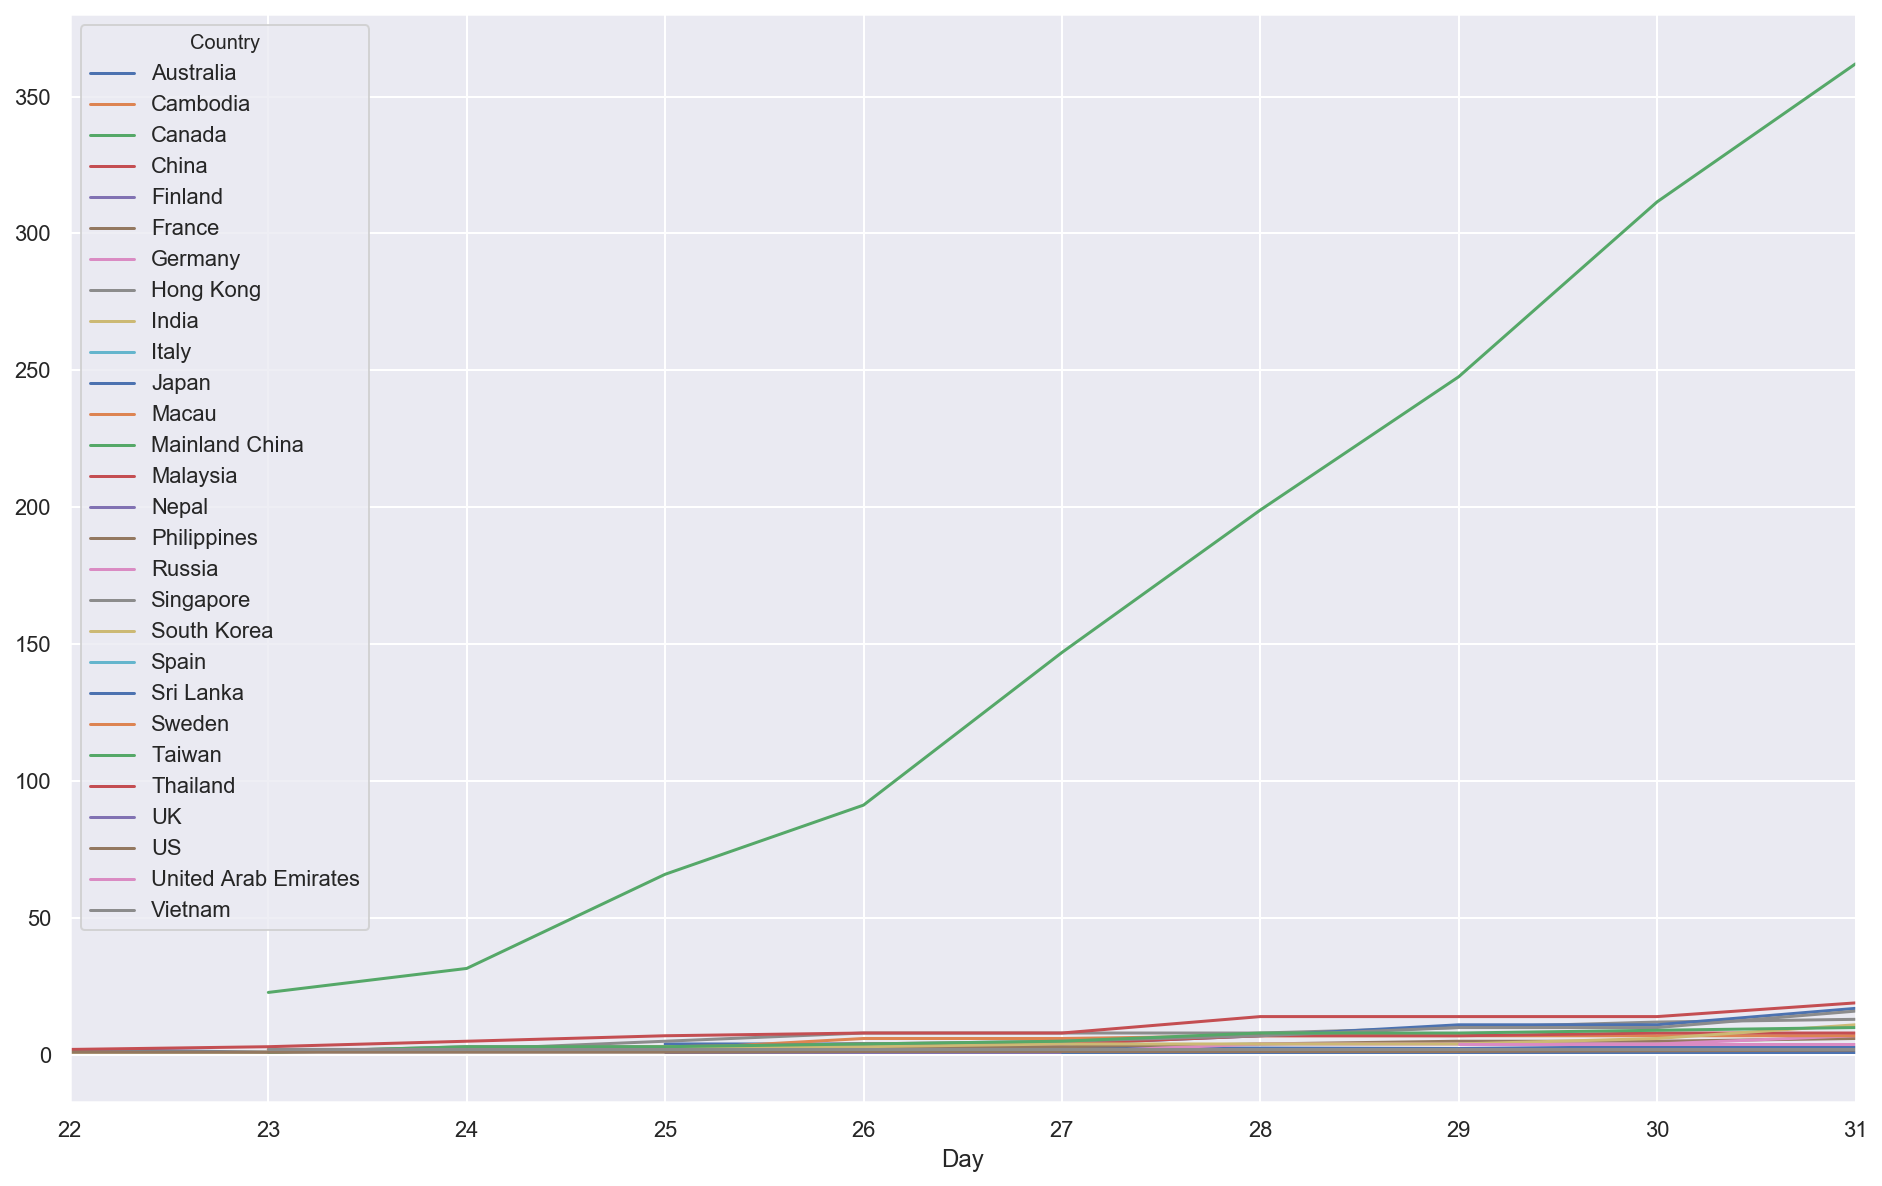

In [17]:
pivoted = pd.pivot_table(data, values='Confirmed', columns='Country', index='Day')
pivoted.plot(figsize=(16,10))

### Countries affected by the Coronavirus(2019-nCoV) at present

In [18]:
countries = data['Country'].unique().tolist()
print(countries)

print("\nTotal countries affected by virus: ",len(countries))

['China', 'US', 'Japan', 'Thailand', 'South Korea', 'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore', 'Vietnam', 'France', 'Australia', 'Nepal', 'Malaysia', 'Canada', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland', 'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK']

Total countries affected by virus:  28


## Present Condition

In [19]:
from datetime import date
data_30 = data[data['Last Update'] > pd.Timestamp(date(2020,1,30))]
data_30.head()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Day,Hour
375,Hubei,Mainland China,2020-01-30 21:30:00,5806.0,204.0,116.0,30,21
376,Zhejiang,Mainland China,2020-01-30 21:30:00,537.0,0.0,9.0,30,21
377,Guangdong,Mainland China,2020-01-30 21:30:00,393.0,0.0,11.0,30,21
378,Henan,Mainland China,2020-01-30 21:30:00,352.0,2.0,3.0,30,21
379,Hunan,Mainland China,2020-01-30 21:30:00,332.0,0.0,2.0,30,21


In [20]:
# Creating a dataframe with total no of cases for every country
cases = pd.DataFrame(data_30.groupby('Country')['Confirmed'].sum())
cases['Country'] = cases.index
cases.index=np.arange(1,28)
global_cases = cases[['Country','Confirmed']]
#global_cases.sort_values(by=['Confirmed'],ascending=False)
global_cases=global_cases.drop([16,19,24,21])

In [21]:
# Make a data frame with dots to show on the map
world_data = pd.DataFrame({
   'name':list(global_cases['Country']),
    'lat':[-25.27,12.57,56.13,61.92,46.23,51.17,22.32,20.59,41.87,36.2,22.2,35.86,4.21,28.39,12.87,1.35,35.91,7.87,23.7,15.87,37.09,23.42,14.06,],
   'lon':[133.78,104.99,-106.35,25.75,2.21,10.45,114.17,78.96,12.56,138.25,113.54,104.19,101.98,84.12,121.77,103.82,127.77,80.77,120.96,100.99,-95.71,53.84,108.28],
   'Confirmed':list(global_cases['Confirmed']),
})

# create map and display it
world_map = folium.Map(location=[10, -20], zoom_start=2.3,tiles='Stamen Toner')

for lat, lon, value, name in zip(world_data['lat'], world_data['lon'], world_data['Confirmed'], world_data['name']):
    folium.CircleMarker([lat, lon],
                        radius=10,
                        popup = ('<strong>Country</strong>: ' + str(name).capitalize() + '<br>'
                                '<strong>Confirmed Cases on 30th Jan 2020</strong>: ' + str(value) + '<br>'),
                        color='red',
                        
                        fill_color='red',
                        fill_opacity=0.7 ).add_to(world_map)
world_map
#world_map.save('countries_affected.html')

In [22]:
data["Country"]=data["Country"].replace(to_replace ="Mainland China", value ="China")
data["Country"]=data["Country"].replace(to_replace ="Macau", value ="Macao SAR, China") 
data["Country"]=data["Country"].replace(to_replace ="Hong Kong", value ="Hong Kong SAR, China") 
data["Country"]=data["Country"].replace(to_replace ="US", value ="United States") 
data["Country"]=data["Country"].replace(to_replace ="Russia", value ="Russian Federation")
data["Country"]=data["Country"].replace(to_replace ="South Korea", value ="Korea, Rep.")
data["Country"]=data["Country"].replace(to_replace ="UK", value ="United Kingdom")


In [23]:
data.rename(columns = {"Country":"Country Name"},inplace=True)

### Let's include some external dataset

1. Countrywise Morality rate 
2. Countrywise Population density 
3. Countrywise Population
4. Transmission Rate we are using the same as we used for china.

In [24]:
health_rate=pd.read_csv("healthrating.csv")[["Country Name","2016"]]
population=pd.read_csv("population.csv")[["Country Name","2018"]]
population_density=pd.read_csv("country_density.csv")[["Country Name","2018"]]

In [25]:
data = pd.merge(data, health_rate, how='left', on='Country Name')
data = pd.merge(data, population, how='left', on='Country Name')
data.rename(columns = {"2016":"Morality rate","2018":"population"},inplace=True)
data= pd.merge(data, population_density, how='left', on='Country Name')
data.rename(columns = {"2018":"population_density"},inplace=True)

In [26]:
data=data.dropna()

In [27]:
data

,Province/State,Country Name,Last Update,Confirmed,Deaths,Recovered,Day,Hour,Morality rate,population,population_density
0,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0,22,12,0.6,1.392730e+09,148.348833
1,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0,22,12,0.6,1.392730e+09,148.348833
2,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0,22,12,0.6,1.392730e+09,148.348833
3,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0,22,12,0.6,1.392730e+09,148.348833
4,Guangdong,China,2020-01-22 12:00:00,26.0,0.0,0.0,22,12,0.6,1.392730e+09,148.348833
...,...,...,...,...,...,...,...,...,...,...,...
462,British Columbia,Canada,2020-01-31 19:00:00,1.0,0.0,0.0,31,19,0.4,3.705886e+07,4.075308
465,New South Wales,Australia,2020-01-31 19:00:00,4.0,0.0,2.0,31,19,0.1,2.499237e+07,3.249129
466,Victoria,Australia,2020-01-31 19:00:00,2.0,0.0,0.0,31,19,0.1,2.499237e+07,3.249129
467,Queensland,Australia,2020-01-31 19:00:00,3.0,0.0,0.0,31,19,0.1,2.499237e+07,3.249129


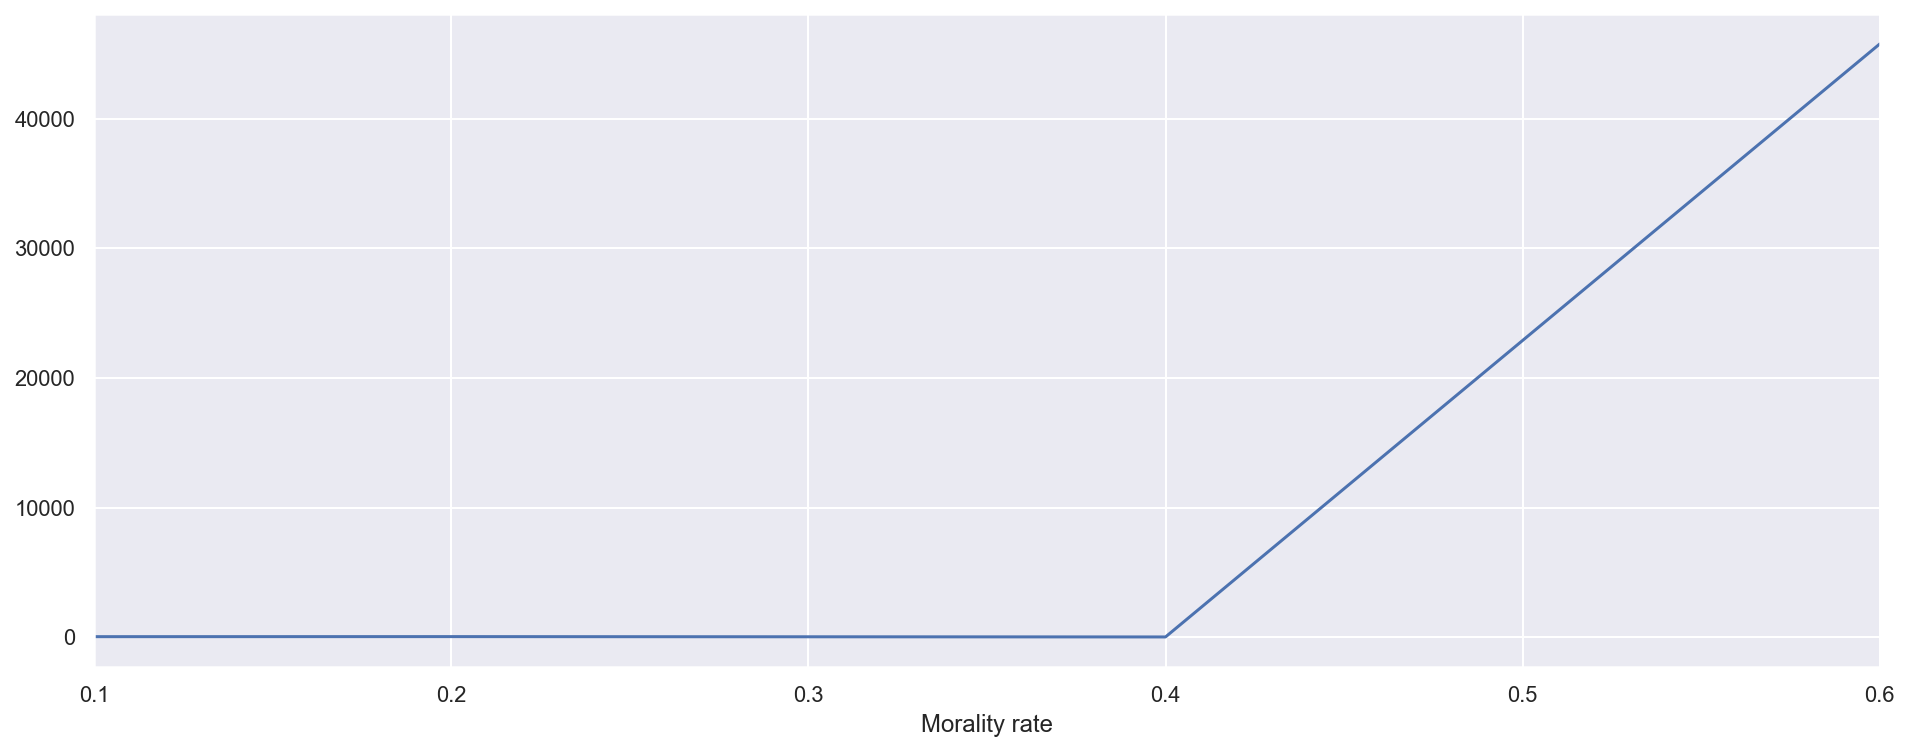

In [28]:
plt.figure(figsize=(16,6))
data.groupby('Morality rate').sum()['Confirmed'].plot()

In [29]:
plt.savefig('moral.png')

<Figure size 432x288 with 0 Axes>

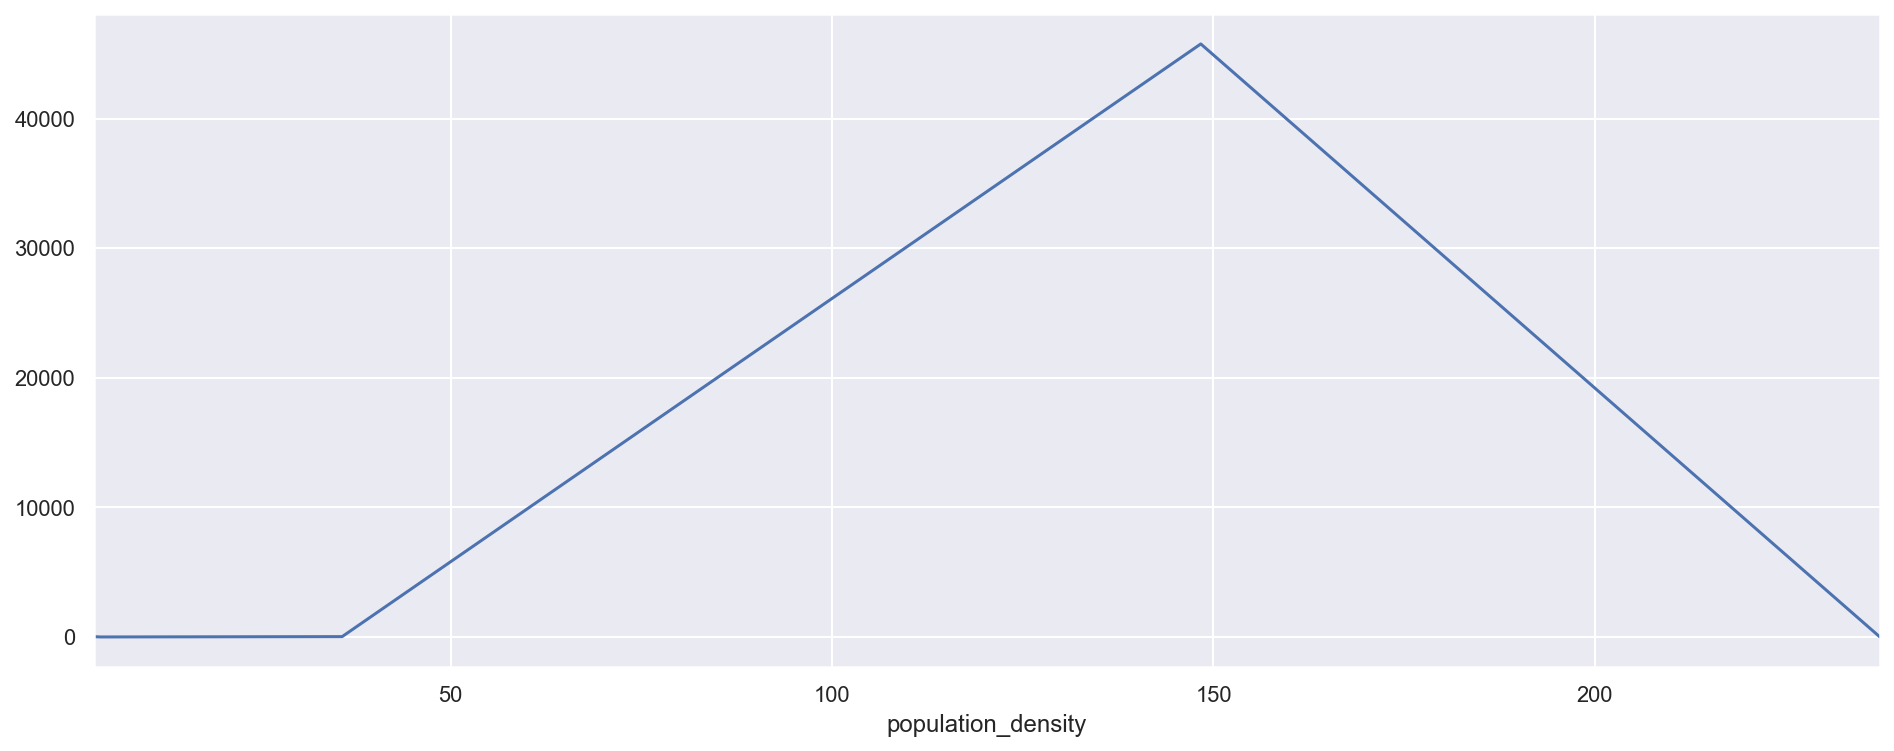

In [30]:
plt.figure(figsize=(16,6))
data.groupby('population_density').sum()['Confirmed'].plot()

In [32]:
plt.savefig('density.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>